<a href="https://colab.research.google.com/github/LordMelodias/Data-Analytics/blob/main/coffeesaledata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Coffee Sales Data Analysis**
**This analysis provides insights into sales performance across different product categories, types, and locations.**

In [166]:
import pandas as pd

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
from matplotlib.ticker import FuncFormatter

In [169]:
df = pd.read_csv("https://raw.githubusercontent.com/LordMelodias/Data-Analytics/main/coffee%20sales%20data.csv")

In [170]:
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Day of Week,Month
0,1,1/1/2023,7:06:11 AM,5,Lower Manhattan,32,2,3.0,$6.00,Coffee,Gourmet brewed coffee,Ethiopia,Regular,January,Sunday,7,0,1
1,2,1/1/2023,7:08:56 AM,5,Lower Manhattan,57,2,3.1,$6.20,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7,0,1
2,3,1/1/2023,7:14:04 AM,5,Lower Manhattan,59,2,4.5,$9.00,Drinking Chocolate,Hot chocolate,Dark chocolate,Large,January,Sunday,7,0,1
3,4,1/1/2023,7:20:24 AM,5,Lower Manhattan,22,1,2.0,$2.00,Coffee,Drip coffee,Our Old Time Diner Blend,Small,January,Sunday,7,0,1
4,5,1/1/2023,7:22:41 AM,5,Lower Manhattan,57,2,3.1,$6.20,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7,0,1


In [171]:
df.shape

(149116, 18)

In [172]:
df.isnull().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
store_id,0
store_location,0
product_id,0
transaction_qty,0
unit_price,0
Total Bill,0
product_category,0


In [173]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'store_location', 'product_id', 'transaction_qty', 'unit_price',
       ' Total Bill ', 'product_category', 'product_type', 'product_detail',
       'Size', 'Month Name', 'Day Name', 'Hour', 'Day of Week', 'Month'],
      dtype='object')

In [174]:
# Remove any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

In [176]:
df['product_category'].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [177]:
df['product_type'].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

In [257]:
df['Month Name'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [178]:
df['product_category'].nunique()

9

In [179]:
df['product_type'].nunique()

29

In [180]:
df['Size'].unique()

array(['Regular', 'Large', 'Small', 'Not Defined'], dtype=object)

In [181]:
df['Size'].value_counts()

,count
Size,
Regular,45789
Large,44885
Not Defined,44518
Small,13924


In [182]:
df['store_id'].unique()

array([5, 8, 3])

In [183]:
# Remove rows where 'Size' is 'Not Defined'
df = df[df['Size'] != 'Not Defined']

In [184]:
df['Size'].value_counts()

,count
Size,
Regular,45789
Large,44885
Small,13924


In [185]:
df.shape

(104598, 18)

In [186]:
df['store_location'].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [187]:
# Remove the currency symbol and convert 'Total Bill' to numeric
df['Total Bill'] = df['Total Bill'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [188]:
# Format function to add commas and a currency symbol (e.g., $)
def currency_format(x, _):
    return f'₹{x:,.0f}'

In [239]:
# Define a coffee-themed color palette
coffee_palette = [
    '#4B3F2D', '#6F4F28', '#8B5E3C', '#3C2A1A', '#C68E4D', '#E2B497', '#F5DEB3', '#D2B48C', '#A67B5B', '#5D3A1A', '#A47149', '#E2B497',]

# Sale Analysis

#**Total sales revenue for each product category**

<ipython-input-252-e0c535b5c06f>:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  ax = sns.countplot(x='product_category', hue='product_category', data=df, palette=coffee_palette)


Text(0.5, 1.0, 'Product Category Distribution')

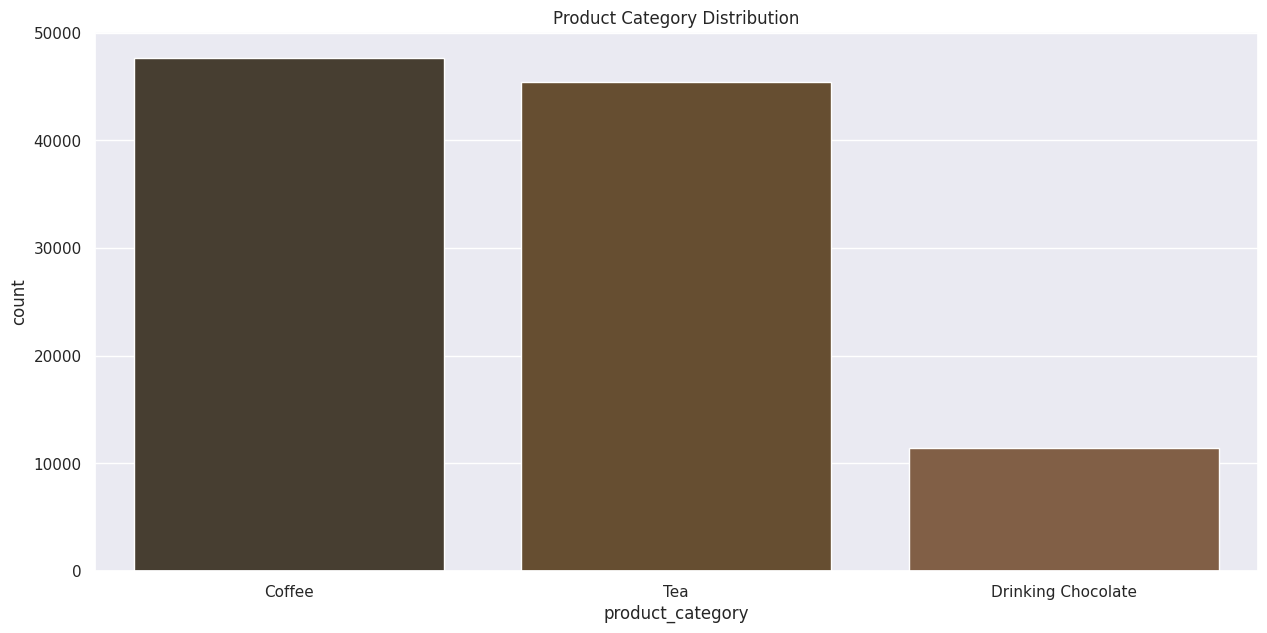

In [252]:
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.countplot(x='product_category', hue='product_category', data=df, palette=coffee_palette)
plt.title('Product Category Distribution')

<ipython-input-253-15ec8c5e4ec0>:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.barplot(x='product_category', y='Total Bill', data=sale_gen, hue='product_category', palette=coffee_palette)


Text(0.5, 1.0, 'Total Sales Revenue by Product Category')

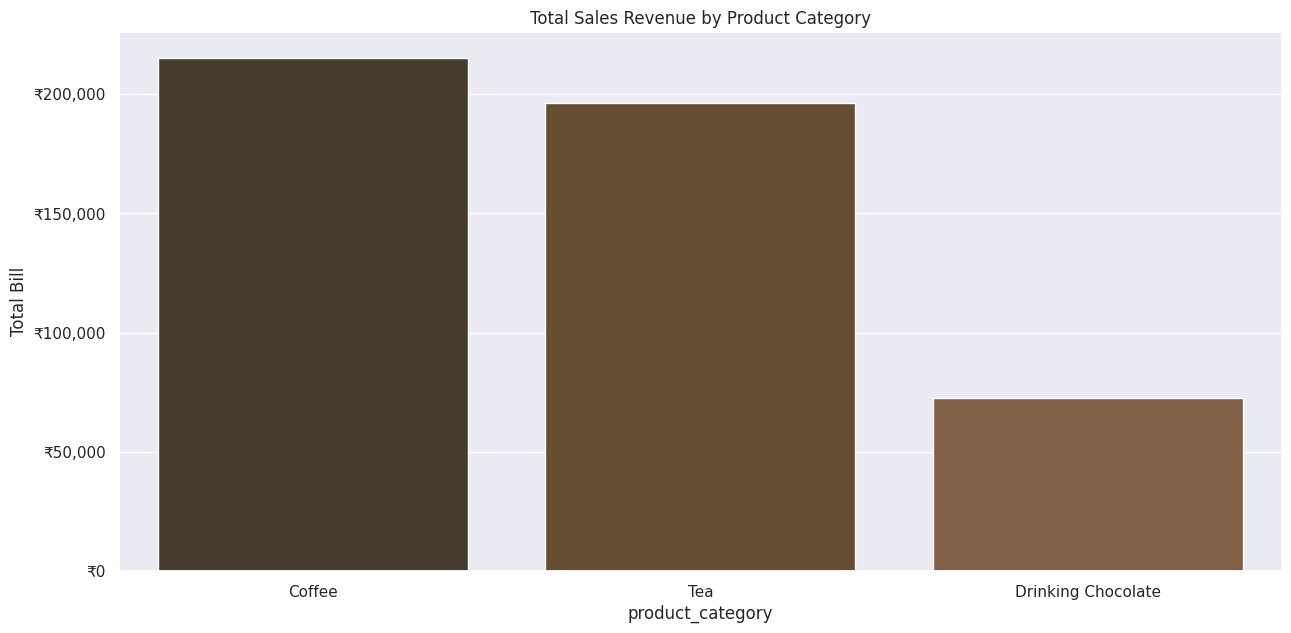

In [253]:
sale_gen = df.groupby(['product_category'], as_index=False)['Total Bill'].sum().sort_values(by='Total Bill', ascending=False)
sns.barplot(x='product_category', y='Total Bill', data=sale_gen, hue='product_category', palette=coffee_palette)
# Apply the format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.title('Total Sales Revenue by Product Category')

In [191]:
# Total sales revenue by product category
sales_by_category = df.groupby('product_category')['Total Bill'].sum().sort_values(ascending=False)
sales_sort = sales_by_category.reset_index()
sales_sort = sales_sort.T
sales_sort

,0,1,2
product_category,Coffee,Tea,Drinking Chocolate
Total Bill,215300.25,196405.95,72416.0



**Coffee is the top-selling product category with ₹215,300.25 in sales, followed by Tea at ₹196,405.95, while Drinking Chocolate generates the least revenue at ₹72,416.00.**

#**Total sales revenue for each product type:**

<ipython-input-254-f774bc864fe0>:2: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  ax = sns.countplot(x='product_type', hue='product_type', data=df, palette=coffee_palette)


Text(0.5, 1.0, 'Product Type Distribution')

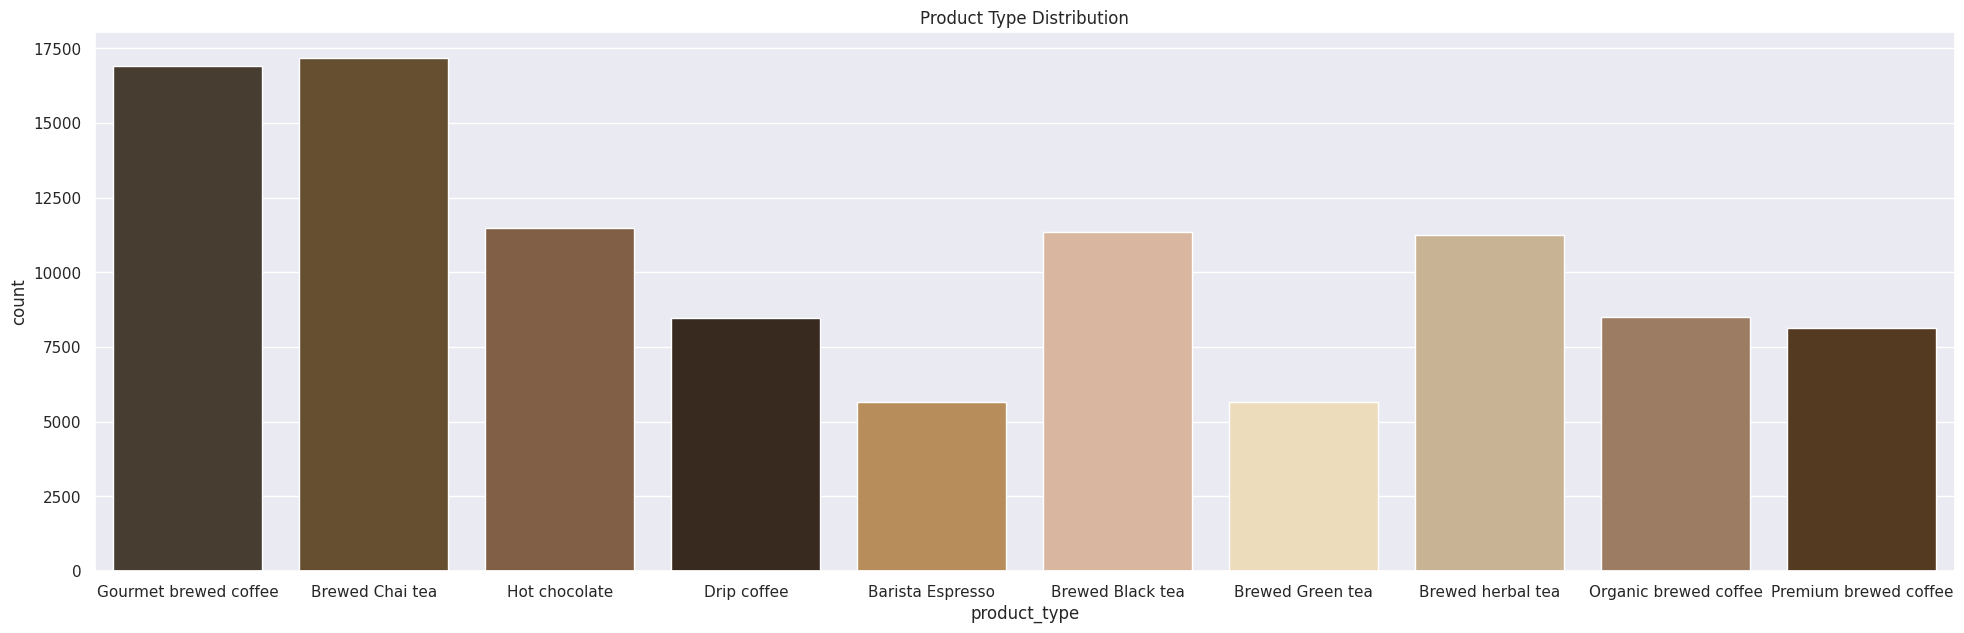

In [254]:
sns.set(rc={'figure.figsize':(24,7)})
ax = sns.countplot(x='product_type', hue='product_type', data=df, palette=coffee_palette)
plt.title('Product Type Distribution')

<ipython-input-235-2458374df92e>:2: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  sns.barplot(x='product_type', y='Total Bill', data=sale_gen, hue='product_type', palette=coffee_palette)


Text(0.5, 1.0, 'Total Sales Revenue by Product type')

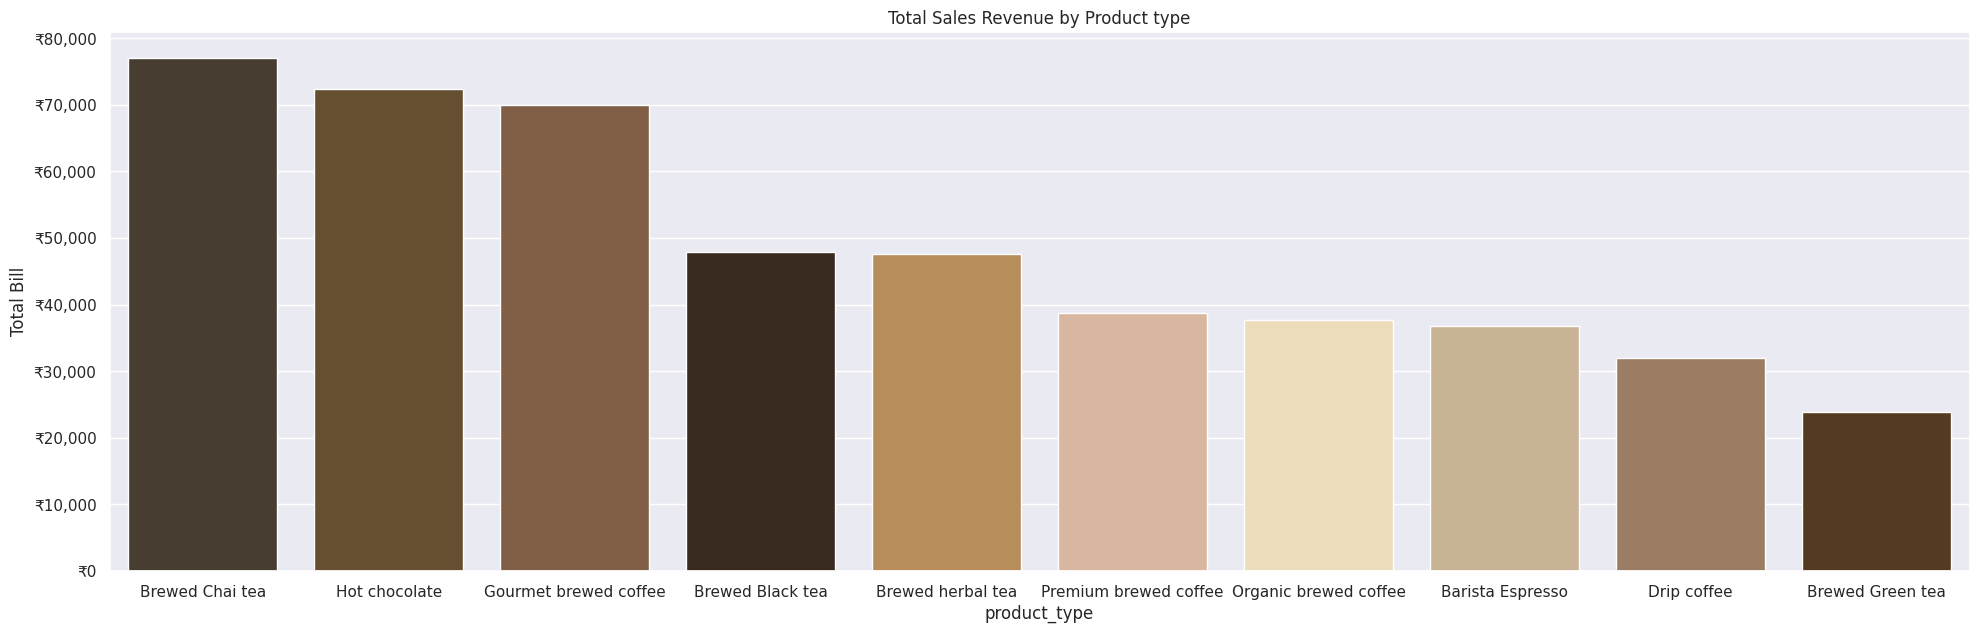

In [235]:
sale_gen = df.groupby(['product_type'], as_index=False)['Total Bill'].sum().sort_values(by='Total Bill', ascending=False)
sns.barplot(x='product_type', y='Total Bill', data=sale_gen, hue='product_type', palette=coffee_palette)
# Apply the format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.title('Total Sales Revenue by Product type')

In [236]:
# Total sales revenue by product type
sales_by_type = df.groupby('product_type')['Total Bill'].sum().sort_values(ascending=False)
sales_by_type = sales_by_type.reset_index()
sales_by_type = sales_by_type.T
sales_by_type

,0,1,2,3,4,5,6,7,8,9
product_type,Brewed Chai tea,Hot chocolate,Gourmet brewed coffee,Brewed Black tea,Brewed herbal tea,Premium brewed coffee,Organic brewed coffee,Barista Espresso,Drip coffee,Brewed Green tea
Total Bill,77081.95,72416.0,70034.6,47932.0,47539.5,38781.15,37746.5,36754.0,31984.0,23852.5


**Brewed Chai tea is the top-selling product type with ₹77,081.95 in sales.**

#**Top-selling products by total revenue:**

<ipython-input-240-dbcce5879db6>:2: UserWarning: 
The palette list has fewer values (12) than needed (17) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x='product_detail', hue='product_detail', data=df, palette=coffee_palette)


Text(0.5, 1.0, 'Product Detail Distribution')

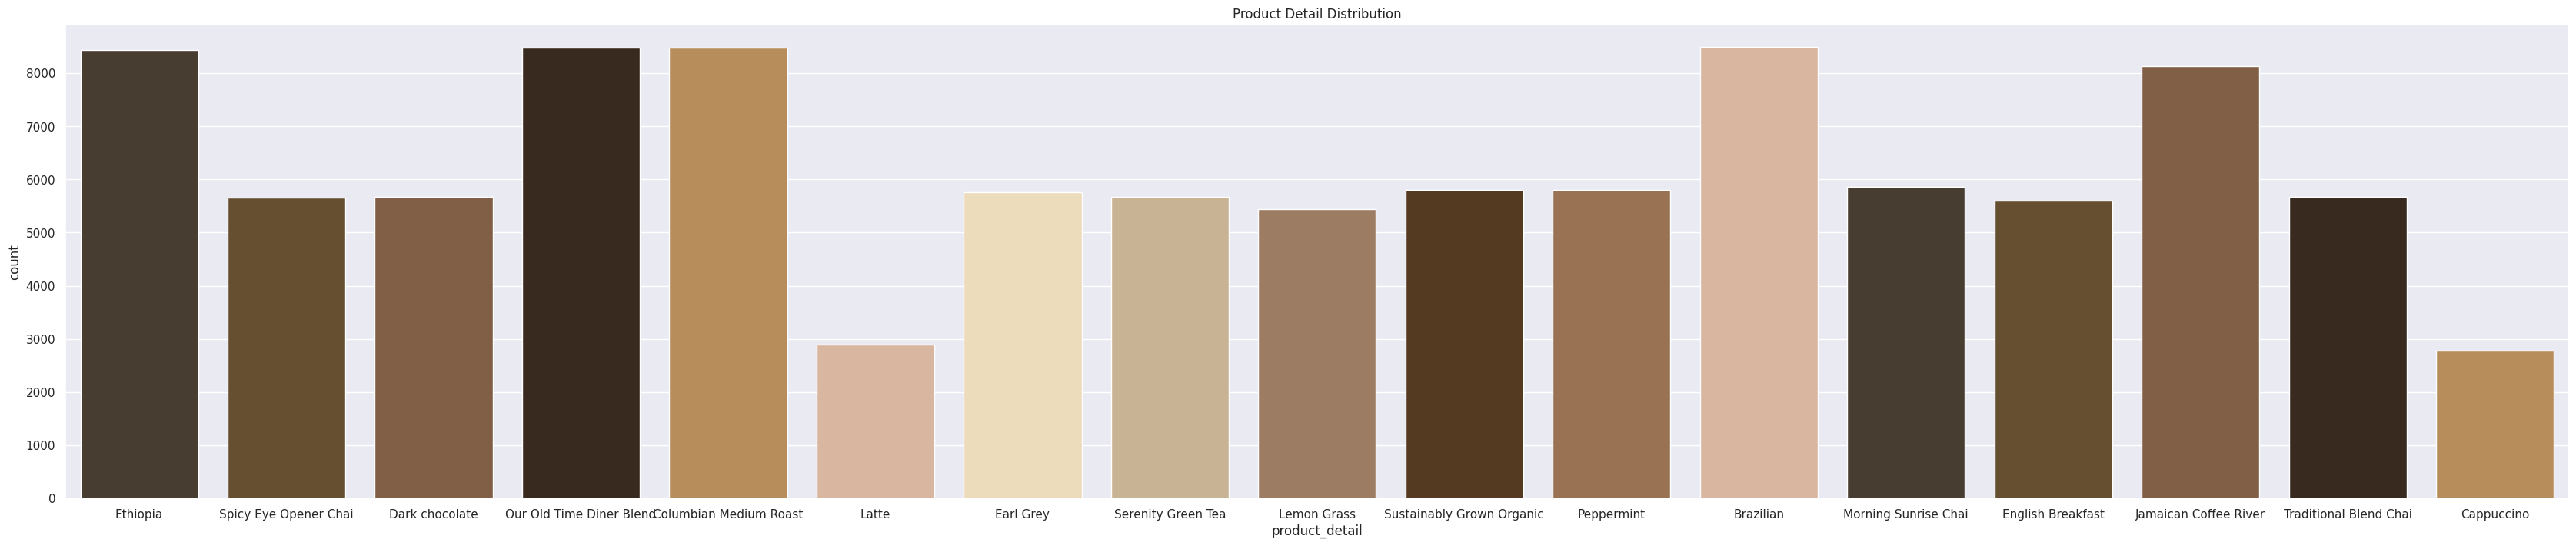

In [240]:
sns.set(rc={'figure.figsize':(42,8)})
ax = sns.countplot(x='product_detail', hue='product_detail', data=df, palette=coffee_palette)
plt.title('Product Detail Distribution')

<ipython-input-241-8ef4950f9b74>:2: UserWarning: 
The palette list has fewer values (12) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='product_detail', y='Total Bill', data=sale_gen, hue='product_detail', palette=coffee_palette)


Text(0.5, 1.0, 'Total Sales Revenue by Product Detail')

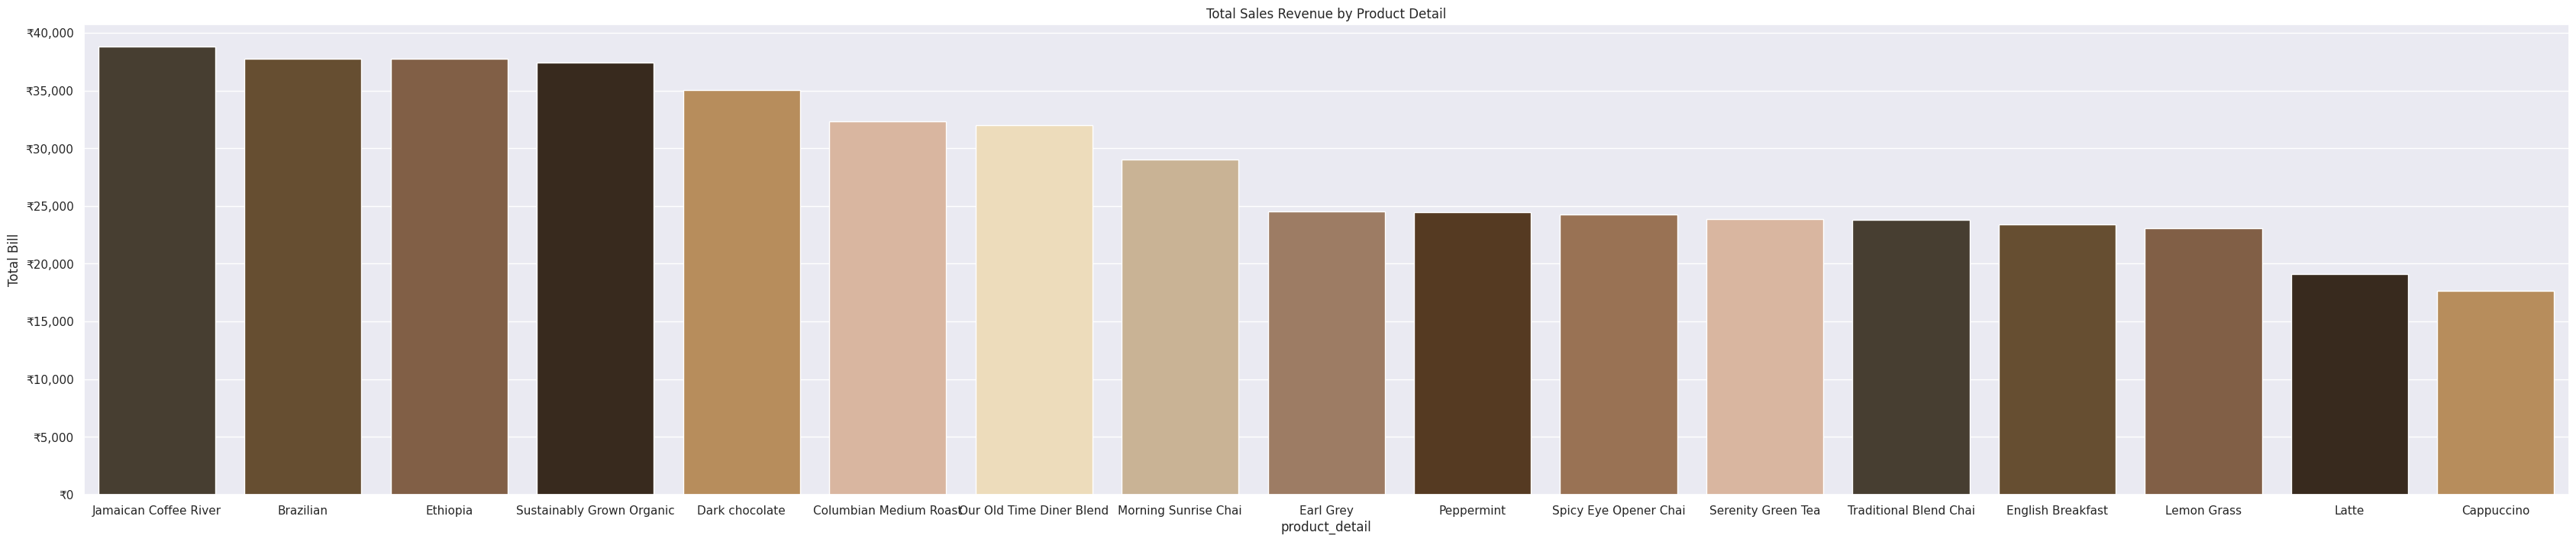

In [241]:
sale_gen = df.groupby(['product_detail'], as_index=False)['Total Bill'].sum().sort_values(by='Total Bill', ascending=False)
sns.barplot(x='product_detail', y='Total Bill', data=sale_gen, hue='product_detail', palette=coffee_palette)
# Apply the format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.title('Total Sales Revenue by Product Detail')

In [198]:
# Total sales revenue by product detail
top_selling_products = df.groupby('product_detail')['Total Bill'].sum().sort_values(ascending=False)
top_selling_products_df = top_selling_products.reset_index()
top_selling_products_df = top_selling_products_df.T
top_selling_products_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
product_detail,Jamaican Coffee River,Brazilian,Ethiopia,Sustainably Grown Organic,Dark chocolate,Columbian Medium Roast,Our Old Time Diner Blend,Morning Sunrise Chai,Earl Grey,Peppermint,Spicy Eye Opener Chai,Serenity Green Tea,Traditional Blend Chai,English Breakfast,Lemon Grass,Latte,Cappuccino
Total Bill,38781.15,37746.5,37726.1,37385.5,35030.5,32308.5,31984.0,28991.5,24505.0,24460.0,24288.45,23852.5,23802.0,23427.0,23079.5,19112.25,17641.75


**Jamaican Coffee River is the top-selling product with ₹38,781.15 in revenue**

#**Total sales revenue by store location:**

<ipython-input-243-03057a6a25b3>:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  ax = sns.countplot(x='store_location', hue='store_location', data=df, palette=coffee_palette)


Text(0.5, 1.0, 'Store Location Distribution')

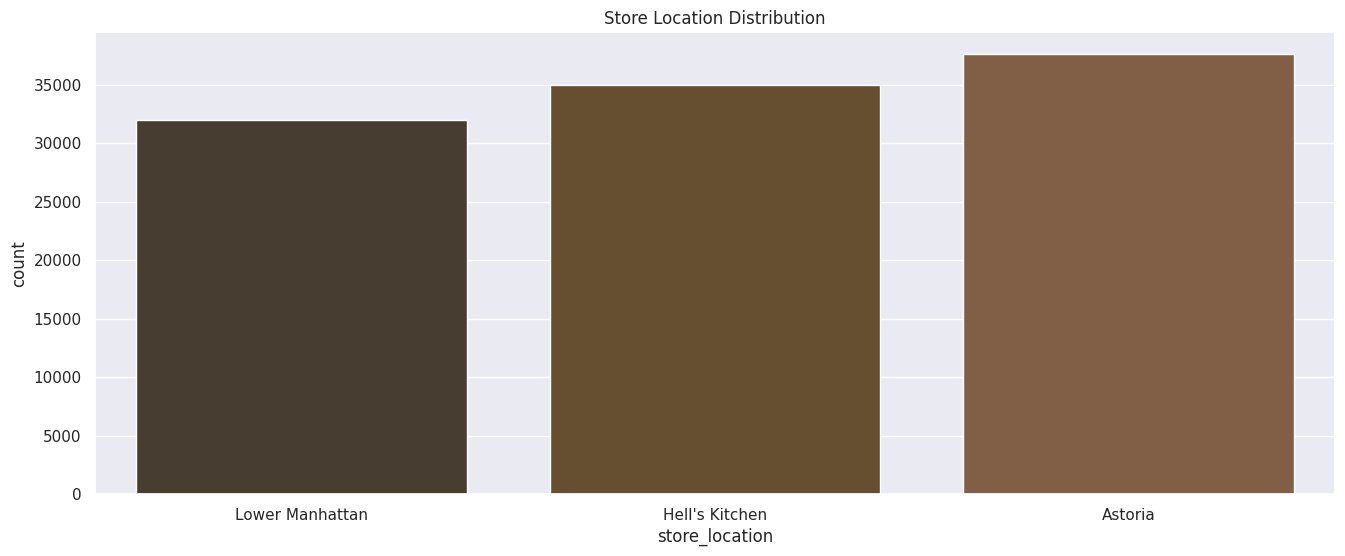

In [243]:
sns.set(rc={'figure.figsize':(16,6)})
ax = sns.countplot(x='store_location', hue='store_location', data=df, palette=coffee_palette)
plt.title('Store Location Distribution')

<ipython-input-244-d3e9221233d1>:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.barplot(x='store_location', y='Total Bill', data=sale_gen, hue='store_location', palette=coffee_palette)


Text(0.5, 1.0, 'Total Sales Revenue by Store Location')

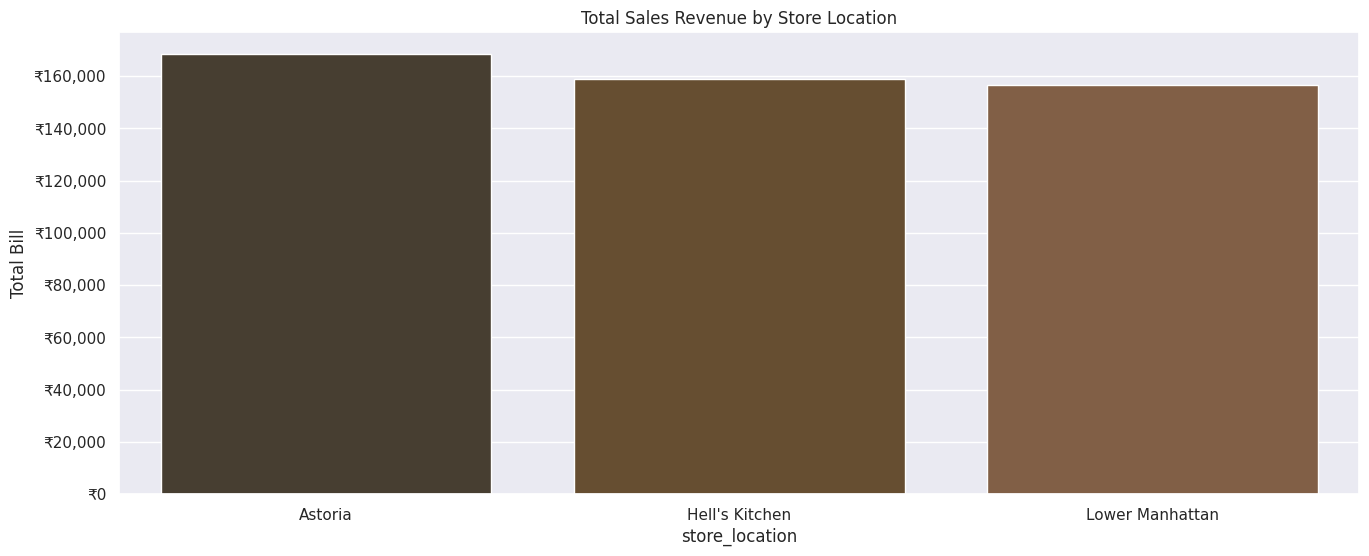

In [244]:
sale_gen = df.groupby(['store_location'], as_index=False)['Total Bill'].sum().sort_values(by='Total Bill', ascending=False)
sns.barplot(x='store_location', y='Total Bill', data=sale_gen, hue='store_location', palette=coffee_palette)
# Apply the format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.title('Total Sales Revenue by Store Location')

In [201]:
sales_by_location = df.groupby('store_location')['Total Bill'].sum().sort_values(ascending=False)
sales_by_location = sales_by_location.reset_index()
sales_by_location = sales_by_location.T
sales_by_location

,0,1,2
store_location,Astoria,Hell's Kitchen,Lower Manhattan
Total Bill,168470.95,158968.75,156682.5


**Astoria had the highest total sales.**

#**Distribution of sales over different months**

<ipython-input-256-13c32362f6e6>:1: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  ax = sns.countplot(x='Month Name', hue='Month Name', data=df, palette=coffee_palette)


Text(0.5, 1.0, 'Month Name Distribution')

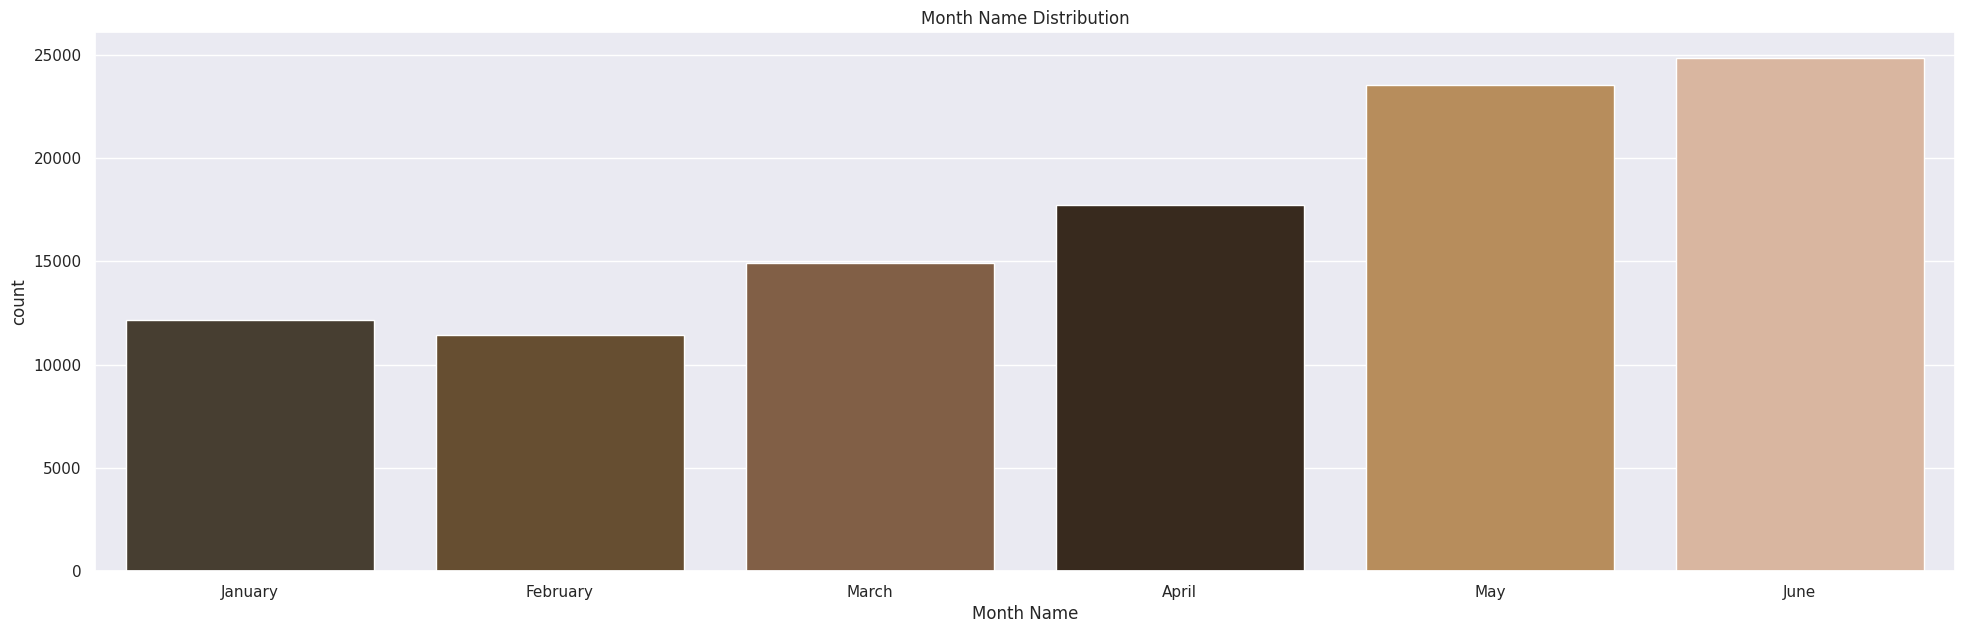

In [256]:
ax = sns.countplot(x='Month Name', hue='Month Name', data=df, palette=coffee_palette)
plt.title('Month Name Distribution')

<ipython-input-255-40fed36b64c4>:2: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.barplot(x='Month Name', y='Total Bill', data=sale_gen, hue='Month Name', palette=coffee_palette)


Text(0.5, 1.0, 'Total Sales Revenue by Month')

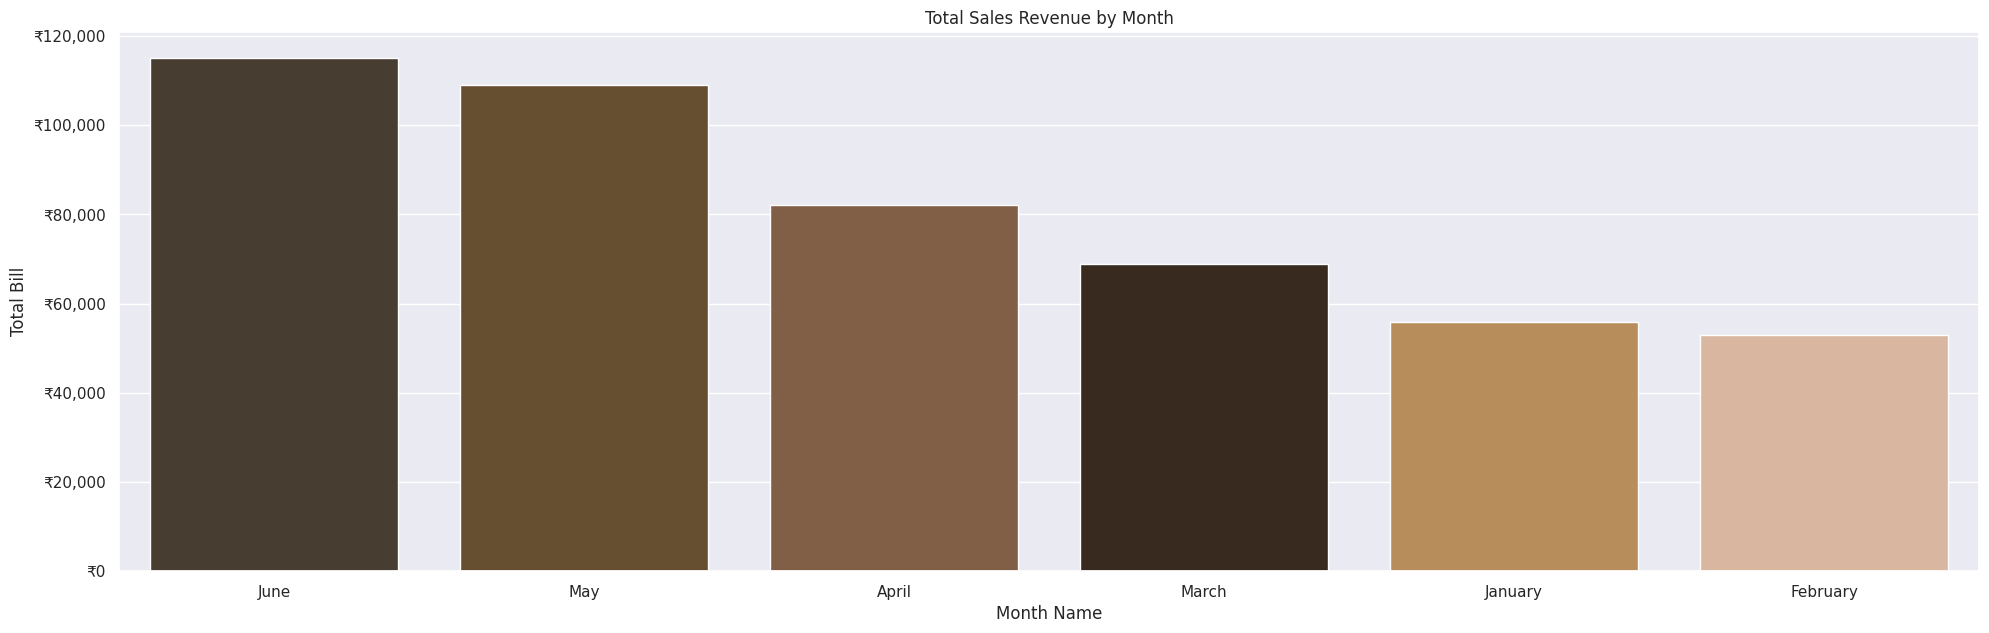

In [255]:
sale_gen = df.groupby(['Month Name'], as_index=False)['Total Bill'].sum().sort_values(by='Total Bill', ascending=False)
sns.barplot(x='Month Name', y='Total Bill', data=sale_gen, hue='Month Name', palette=coffee_palette)
# Apply the format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.title('Total Sales Revenue by Month')

In [203]:
# Total sales revenue by month
sales_by_month = df.groupby('Month Name')['Total Bill'].sum().sort_values(ascending=False)
sales_by_month = sales_by_month.reset_index()
sales_by_month = sales_by_month.T
sales_by_month

,0,1,2,3,4,5
Month Name,June,May,April,March,January,February
Total Bill,115105.4,109064.95,82133.5,68821.05,55967.1,53030.2


**Sales revenue peaked in June.**

#Product Performance

#**Which product size generates the most revenue:**

<ipython-input-246-f2afaec3a9c5>:1: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  ax = sns.countplot(x='Size', hue='Size', data=df, palette=coffee_palette)


Text(0.5, 1.0, 'Cup Size Distribution')

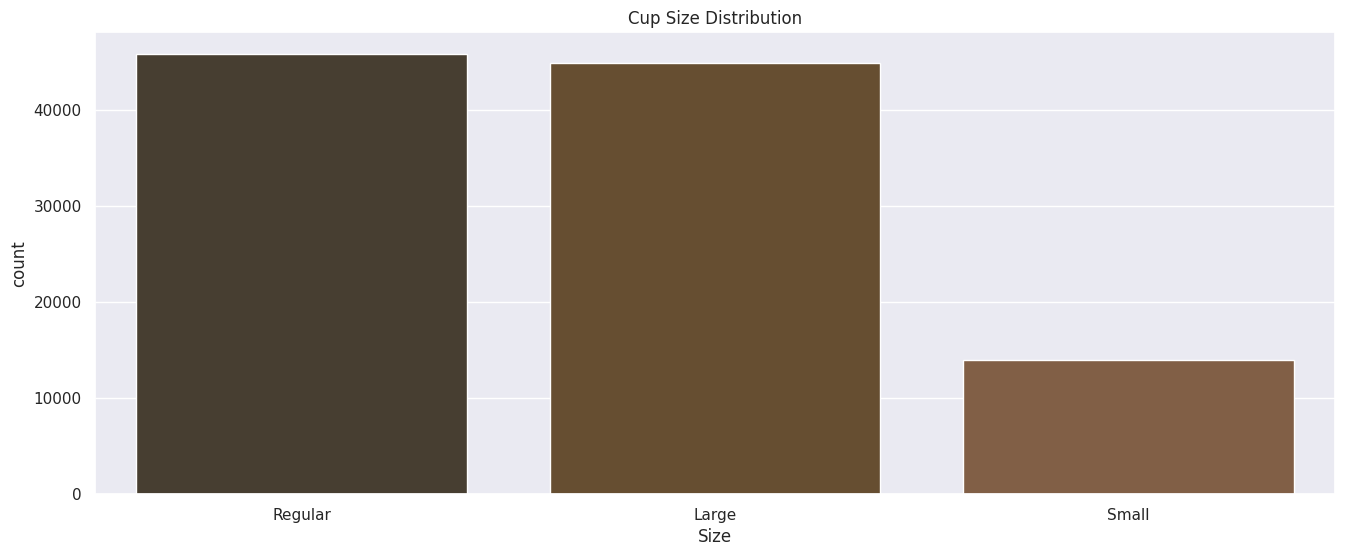

In [246]:
ax = sns.countplot(x='Size', hue='Size', data=df, palette=coffee_palette)
plt.title('Cup Size Distribution')

<ipython-input-247-e583ca003288>:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.barplot(x='Size', y='Total Bill', data=sale_gen, hue='Size', palette=coffee_palette)


Text(0.5, 1.0, 'Total Sales Revenue by Size')

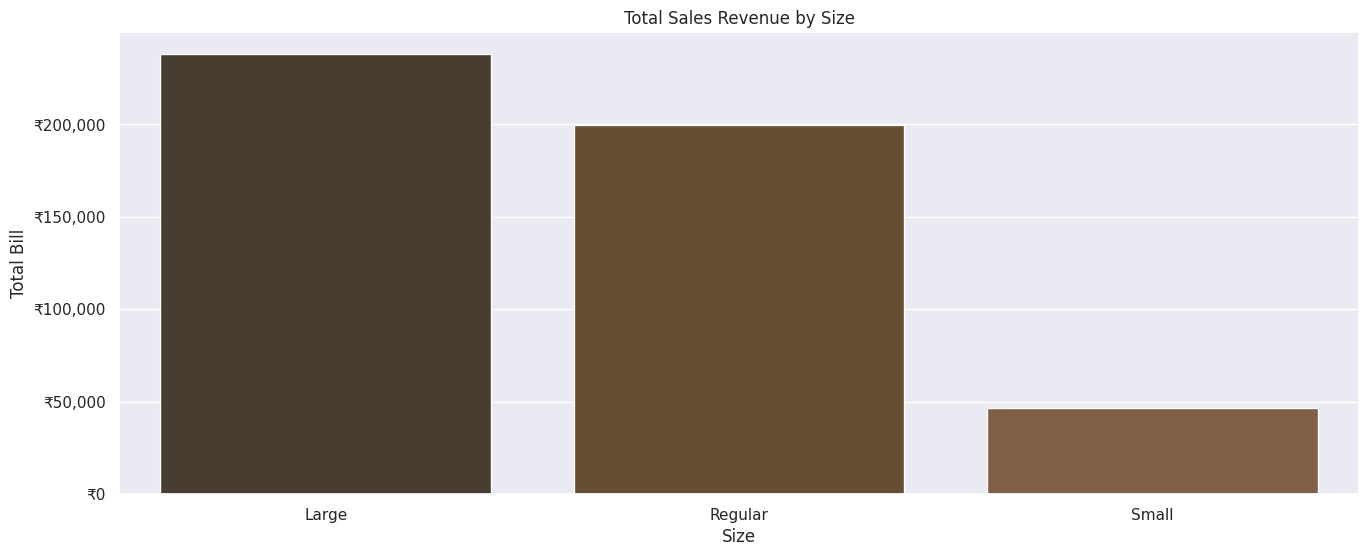

In [247]:
sale_gen = df.groupby(['Size'], as_index=False)['Total Bill'].sum().sort_values(by='Total Bill', ascending=False)
sns.barplot(x='Size', y='Total Bill', data=sale_gen, hue='Size', palette=coffee_palette)
# Apply the format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.title('Total Sales Revenue by Size')

In [206]:
# Total sales revenue by size
sales_by_size = df.groupby('Size')['Total Bill'].sum()
sales_by_size = sales_by_size.reset_index()
sales_by_size = sales_by_size.T
sales_by_size

,0,1,2
Size,Large,Regular,Small
Total Bill,237958.15,199761.35,46402.7


**Large Product Size generate more revenue.**

#**Quantity sold by size**

<ipython-input-259-efcd7b8911c8>:1: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  ax = sns.countplot(x='transaction_qty', hue='Size', data=df, palette=coffee_palette)


Text(0.5, 1.0, 'Transaction Quantity Distribution')

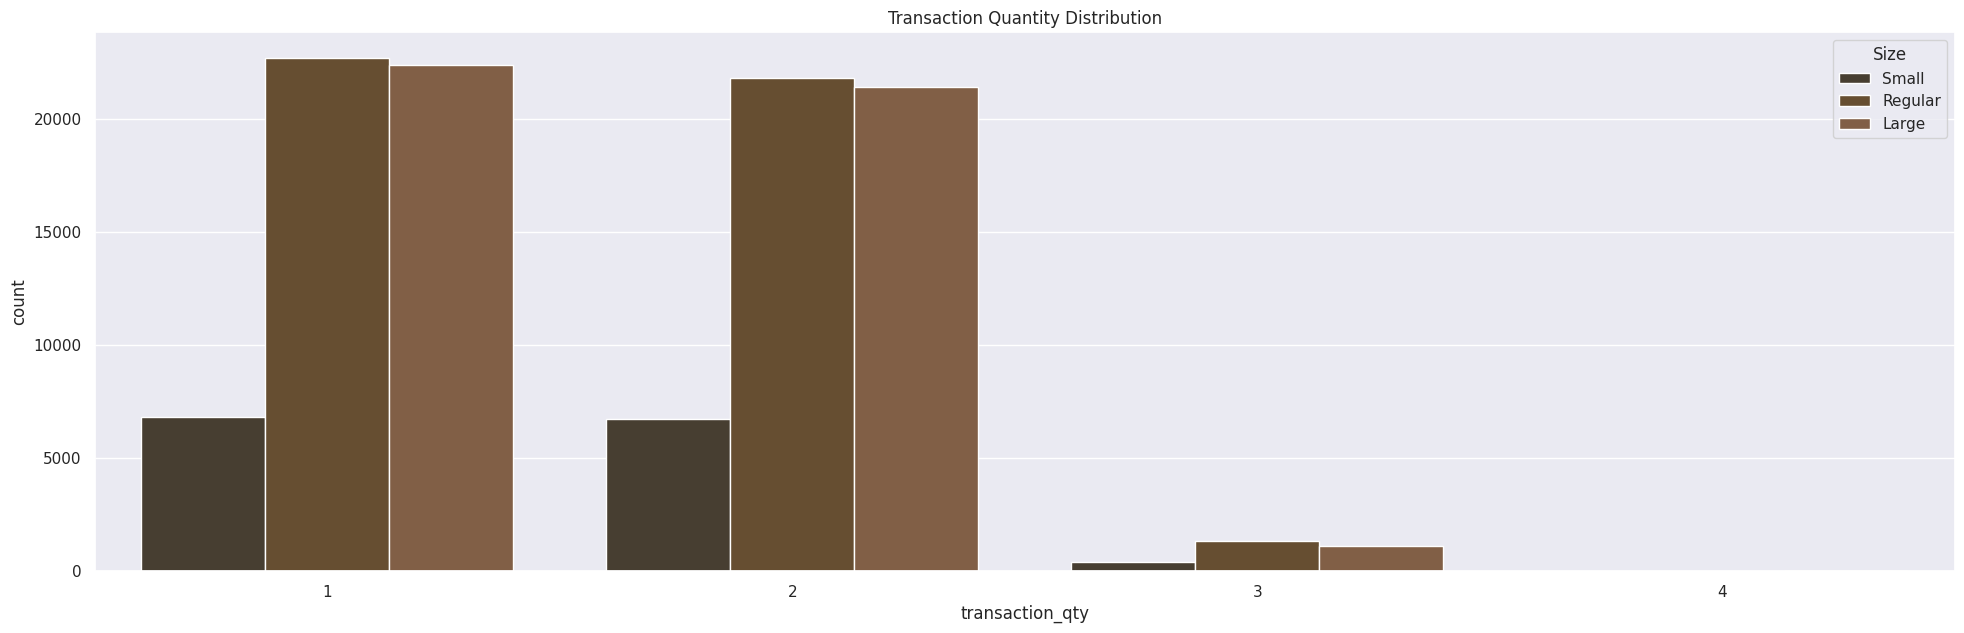

In [259]:
ax = sns.countplot(x='transaction_qty', hue='Size', data=df, palette=coffee_palette)
plt.title('Transaction Quantity Distribution')

<ipython-input-258-a0d36ec2406c>:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.barplot(x='Size', y='transaction_qty', data=sale_gen, hue='Size', palette=coffee_palette)


Text(0.5, 1.0, 'Total quantity sold by size')

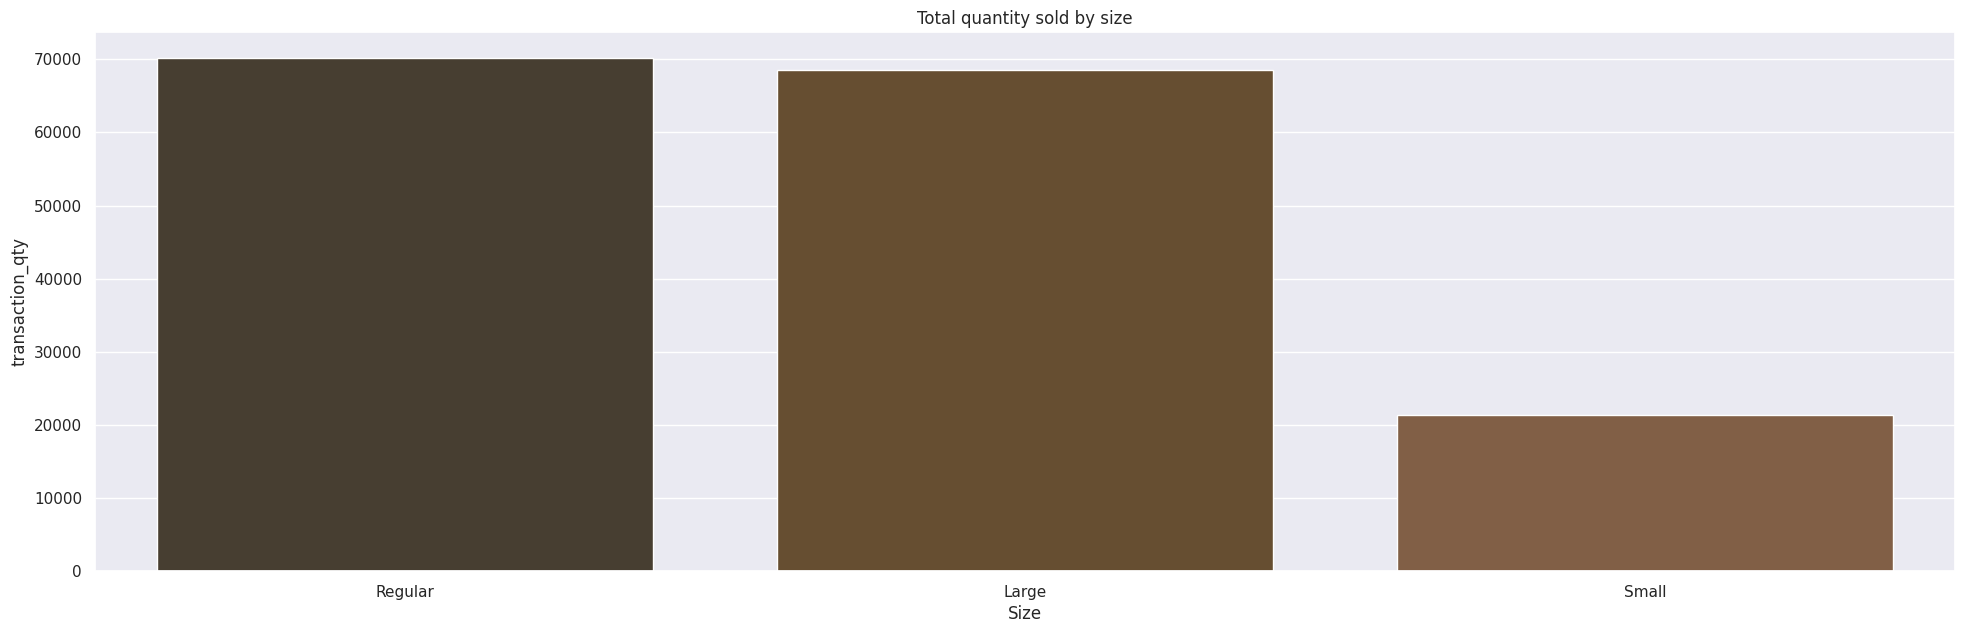

In [258]:
sale_gen = df.groupby(['Size'], as_index=False)['transaction_qty'].sum().sort_values(by='transaction_qty', ascending=False)
sns.barplot(x='Size', y='transaction_qty', data=sale_gen, hue='Size', palette=coffee_palette)
plt.title('Total quantity sold by size')

In [210]:
# Total quantity sold by size
quantity_by_size = df.groupby('Size')['transaction_qty'].sum().sort_values(ascending=False)
quantity_by_size = quantity_by_size.reset_index()
quantity_by_size = quantity_by_size.T
quantity_by_size

,0,1,2
Size,Regular,Large,Small
transaction_qty,70186,68540,21423


**The quantity of 1 is the most common with Regular-sized products.**

#**Store Performance**

<ipython-input-262-1eea7bb69890>:1: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  ax = sns.countplot(x='store_id', hue='store_id', data=df, palette=coffee_palette)


Text(0.5, 1.0, 'Store Distribution')

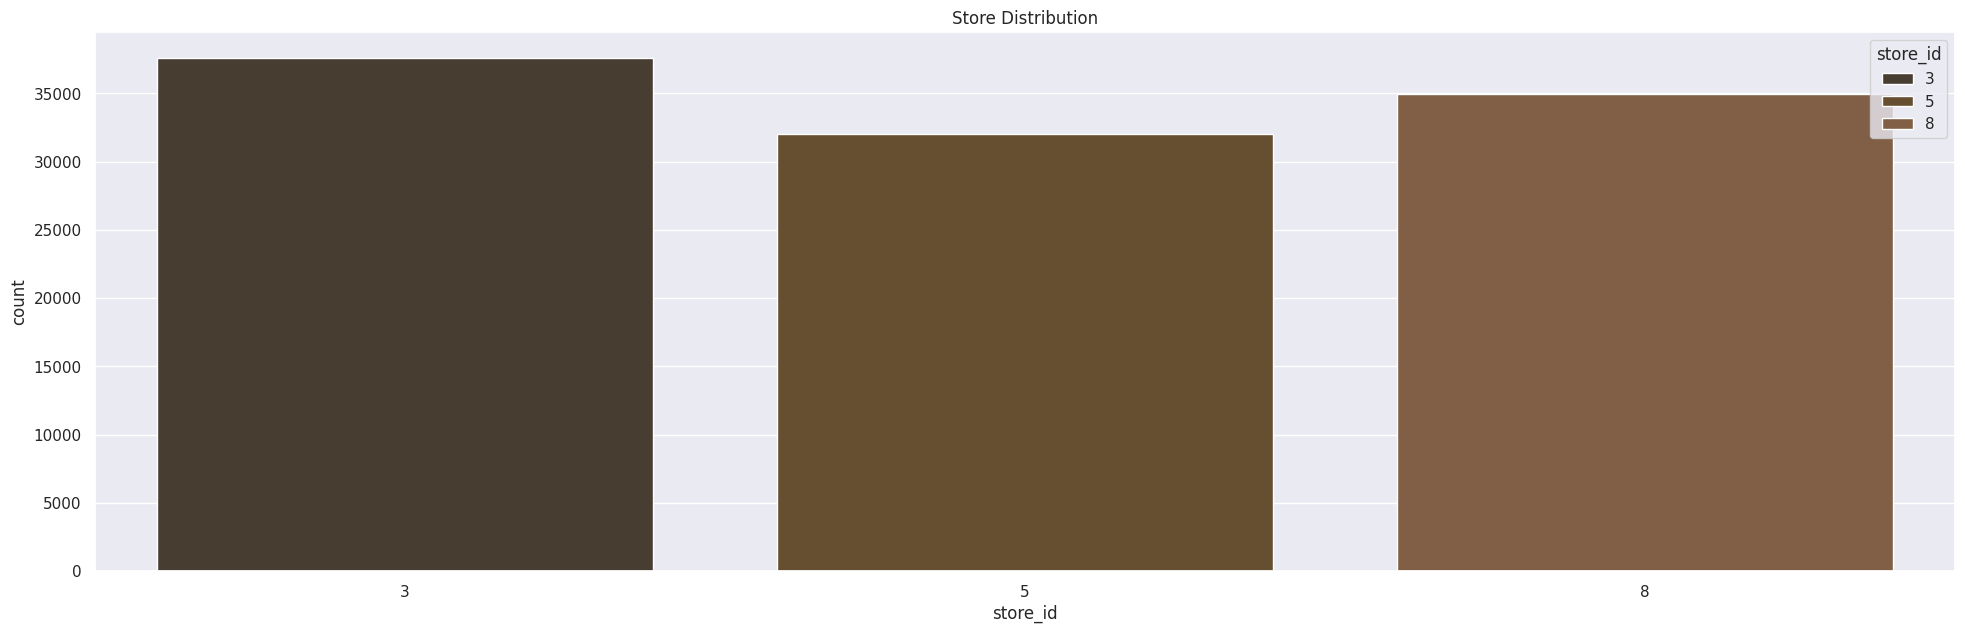

In [262]:
ax = sns.countplot(x='store_id', hue='store_id', data=df, palette=coffee_palette)
plt.title('Store Distribution')

<ipython-input-261-5f19712ccb91>:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.barplot(x='store_id', y='Total Bill', data=sale_gen, hue='store_id', palette=coffee_palette)


Text(0.5, 1.0, 'Total Sales Revenue by Store')

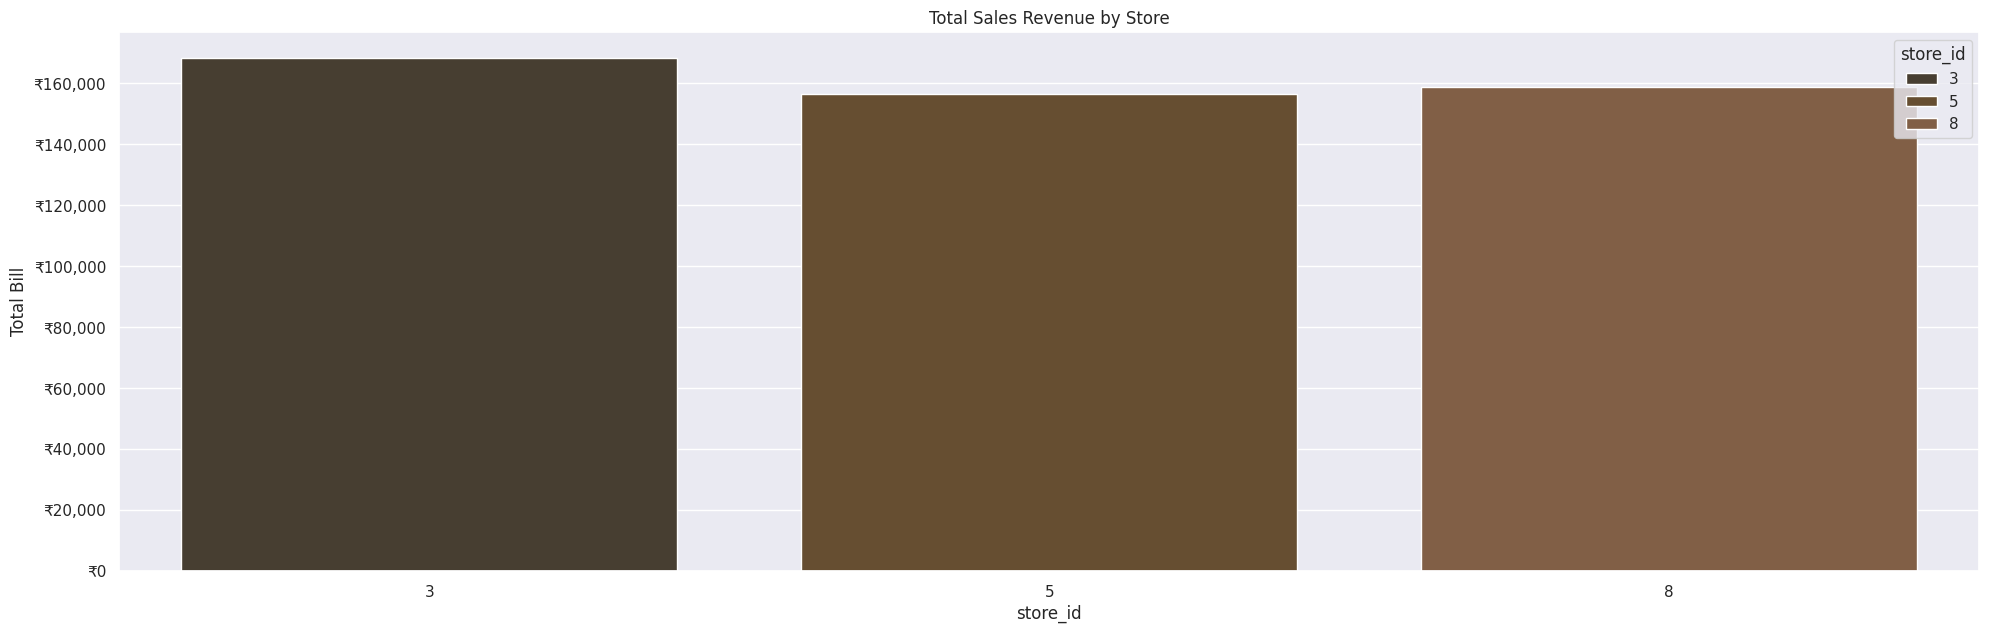

In [261]:
sale_gen = df.groupby(['store_id'], as_index=False)['Total Bill'].sum().sort_values(by='Total Bill', ascending=False)
sns.barplot(x='store_id', y='Total Bill', data=sale_gen, hue='store_id', palette=coffee_palette)
# Apply the format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.title('Total Sales Revenue by Store')

In [212]:
# Total sales revenue by store ID
sales_by_store = df.groupby('store_id')['Total Bill'].sum().sort_values(ascending=False)
sales_by_store = sales_by_store.reset_index()
sales_by_store = sales_by_store.T
sales_by_store

,0,1,2
store_id,3.00,8.00,5.0
Total Bill,168470.95,158968.75,156682.5


**Store No: 3 is top selling store.**

#**Most popular products in each store location**

<ipython-input-263-ebcc435ff30b>:2: UserWarning: 
The palette list has fewer values (12) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='store_location', y='Total Bill', data=sale_gen, hue='product_detail',palette=coffee_palette)


Text(0.5, 1.0, 'Most popular products by store location')

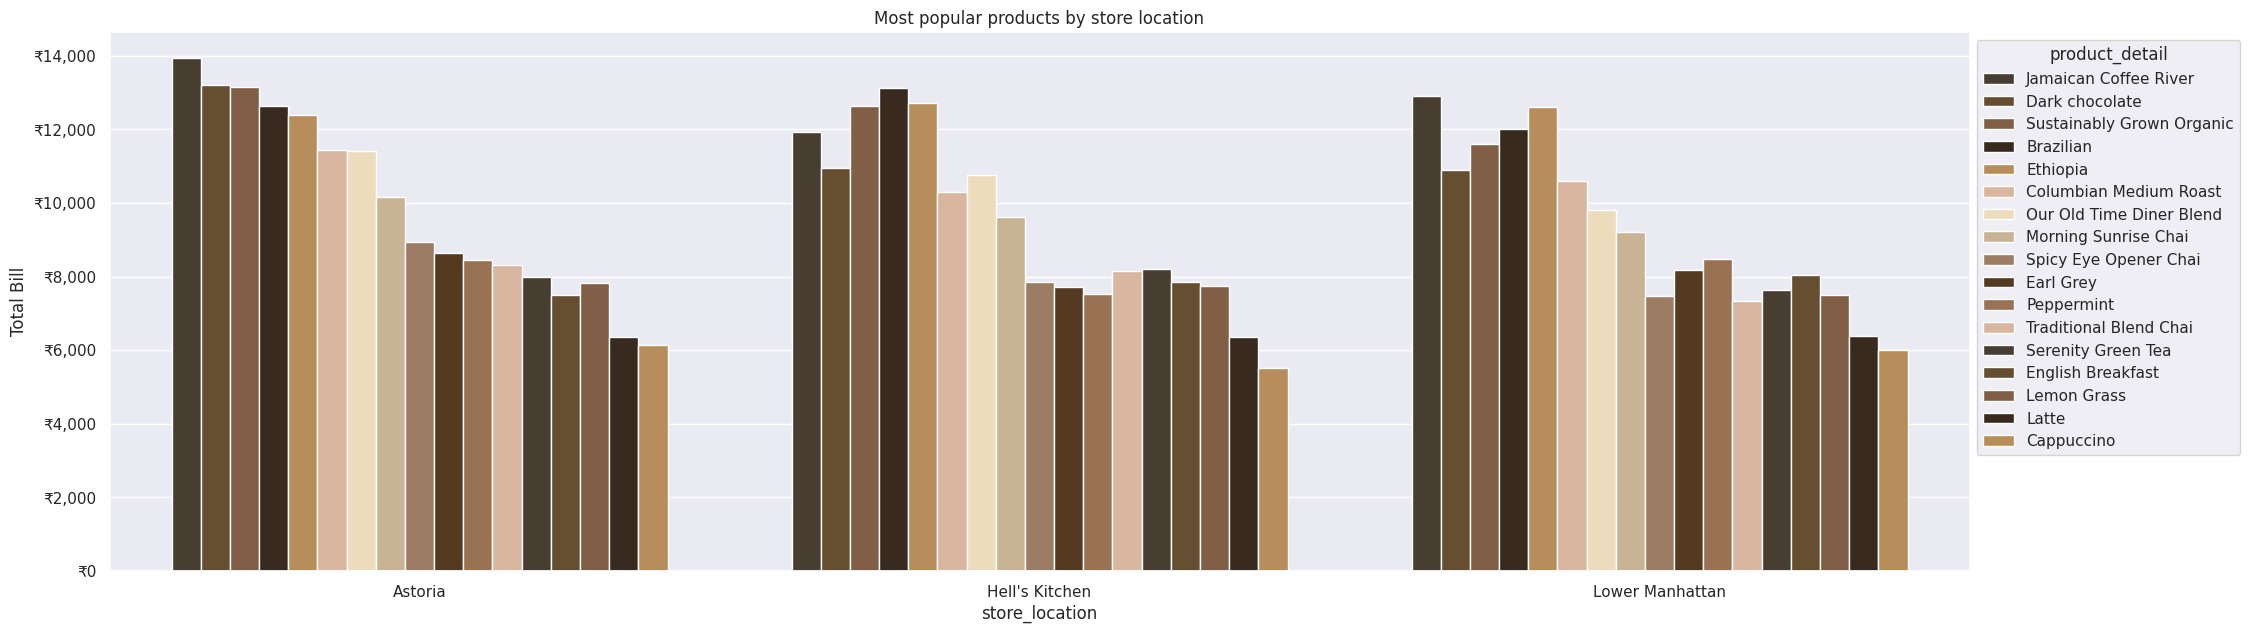

In [263]:
sale_gen = df.groupby(['store_location', 'product_detail'], as_index=False)['Total Bill'].sum().sort_values(by='Total Bill', ascending=False)
sns.barplot(x='store_location', y='Total Bill', data=sale_gen, hue='product_detail',palette=coffee_palette)
sns.move_legend(plt.gca(), loc='upper left', bbox_to_anchor=(1, 1))
# Apply the format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.title('Most popular products by store location')

In [214]:
# Most popular products by store location
popular_products_by_location = df.groupby(['store_location', 'product_detail'])['Total Bill'].sum().unstack()
popular_products_by_location

product_detail,Brazilian,Cappuccino,Columbian Medium Roast,Dark chocolate,Earl Grey,English Breakfast,Ethiopia,Jamaican Coffee River,Latte,Lemon Grass,Morning Sunrise Chai,Our Old Time Diner Blend,Peppermint,Serenity Green Tea,Spicy Eye Opener Chai,Sustainably Grown Organic,Traditional Blend Chai
store_location,,,,,,,,,,,,,,,,,
Astoria,12623.2,6128.50,11429.5,13193.0,8629.5,7511.5,12393.8,13946.30,6358.00,7833.5,10170.5,11416.5,8448.5,7989.0,8941.40,13142.25,8316.0
Hell's Kitchen,13114.0,5512.25,10287.5,10954.5,7711.0,7864.5,12722.6,11927.85,6366.50,7735.0,9624.5,10750.5,7528.0,8217.5,7864.30,12631.75,8156.5
Lower Manhattan,12009.3,6001.00,10591.5,10883.0,8164.5,8051.0,12609.7,12907.00,6387.75,7511.0,9196.5,9817.0,8483.5,7646.0,7482.75,11611.50,7329.5


**Jamaican Coffee River is the top-selling product across all locations, with Dark Chocolate and Ethiopia also performing well.**

#**Conculsion:**

**Coffee is the top-selling product category, generating ₹215,300.25 in sales, followed by Tea at ₹196,405.95, while Drinking Chocolate generates the least revenue at ₹72,416.00. Brewed Chai tea leads as the top-selling product type with ₹77,081.95 in sales. The Jamaican Coffee River is the top-selling product with ₹38,781.15 in revenue. Astoria achieved the highest total sales, and revenue peaked in June. Large cup-sized products contribute more to revenue, and Regular cup-sized products are the most common in terms of quantity. Store No: 3 is the top-selling store, with Jamaican Coffee River being the top product across all locations, while Dark Chocolate and Ethiopia also performed well.**